In [15]:
from PIL import Image
from numpy import *
from pylab import *
from scipy.ndimage import filters, measurements, morphology
import matplotlib.pyplot as plt


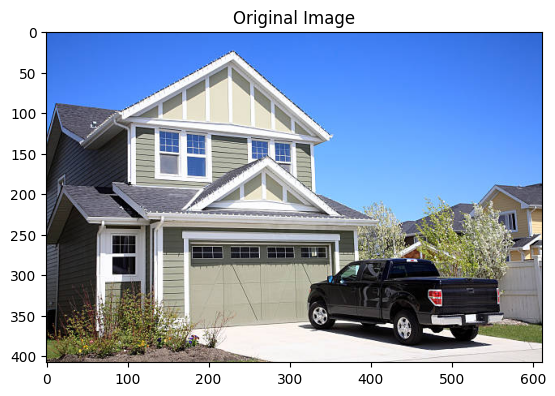

<ipython-input-16-2757630113>:14: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  blurred = filters.gaussian_filter(img, sigma)


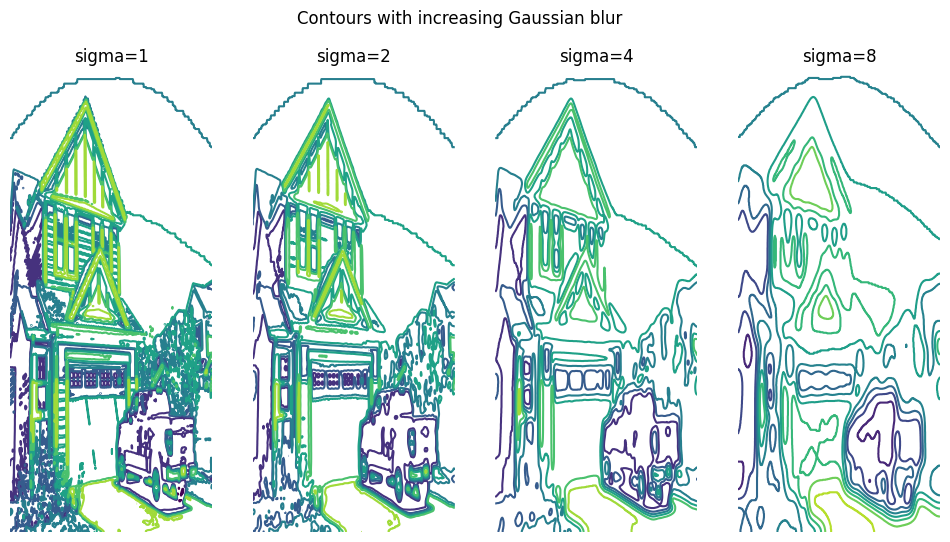

In [16]:
## EXERCISE 1

img = array(Image.open('/content/istockphoto-180735173-612x612.jpg'))#
plt.imshow(img)
plt.title("Original Image")

plt.show()


img = array(Image.open('/content/istockphoto-180735173-612x612.jpg').convert('L'))#
plt.figure(figsize=(12, 6))
sigmas = [1, 2, 4, 8]
for i, sigma in enumerate(sigmas):
    blurred = filters.gaussian_filter(img, sigma)
    plt.subplot(1, len(sigmas), i+1)
    plt.contour(blurred, origin='image')
    plt.title(f'sigma={sigma}')
    plt.axis('off')
plt.suptitle("Contours with increasing Gaussian blur")
plt.show()


<ipython-input-17-2671919980>:5: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  blurred = filters.gaussian_filter(im, sigma)


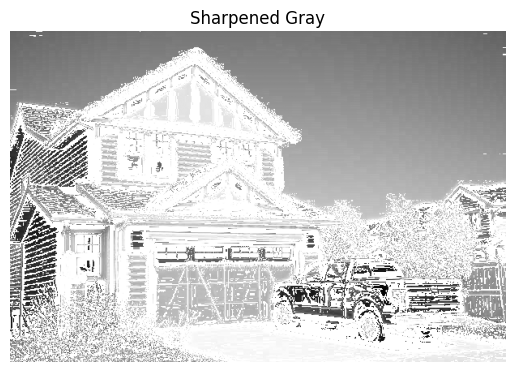

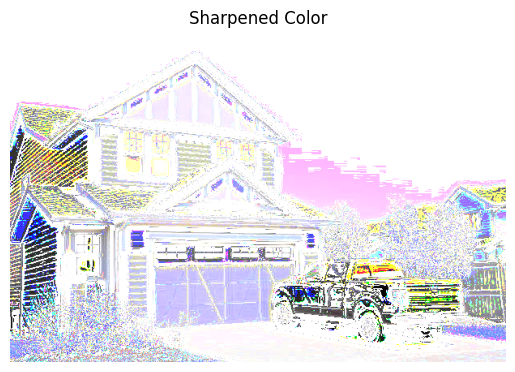

In [17]:
###        Exercise 2: Unsharp Masking


def unsharp_mask(im, sigma=3, alpha=1.5):
    blurred = filters.gaussian_filter(im, sigma)
    sharp = im + alpha * (im - blurred)
    return clip(sharp, 0, 255).astype('uint8')

im_gray = array(Image.open('/content/istockphoto-180735173-612x612.jpg').convert('L'))
im_color = array(Image.open('/content/istockphoto-180735173-612x612.jpg'))

sharp_gray = unsharp_mask(im_gray)
sharp_color = unsharp_mask(im_color)

imshow(sharp_gray, cmap='gray'); title('Sharpened Gray'); axis('off')
plt.figure()
imshow(sharp_color); title('Sharpened Color'); axis('off')
plt.show()

<ipython-input-18-1158904130>:5: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  blurred = filters.gaussian_filter(im, 5)


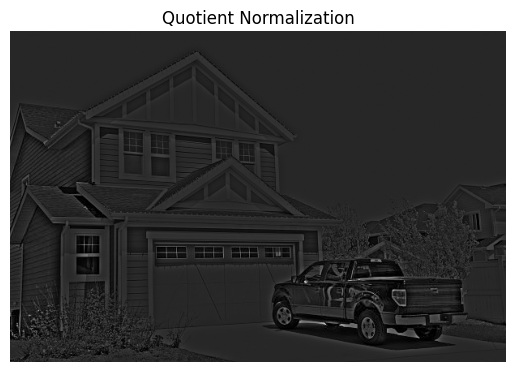

In [18]:
### Exercise 3: Quotient Image Normalization


im = array(Image.open('/content/istockphoto-180735173-612x612.jpg').convert('L')).astype('float')
blurred = filters.gaussian_filter(im, 5)
quotient = im / (blurred + 1e-5)  # Avoid divide by zero

imshow(quotient, cmap='gray'); title('Quotient Normalization'); axis('off')
plt.show()

<ipython-input-19-1879463802>:4: DeprecationWarning: Please import `sobel` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  imx = filters.sobel(im, 1)
<ipython-input-19-1879463802>:5: DeprecationWarning: Please import `sobel` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  imy = filters.sobel(im, 0)


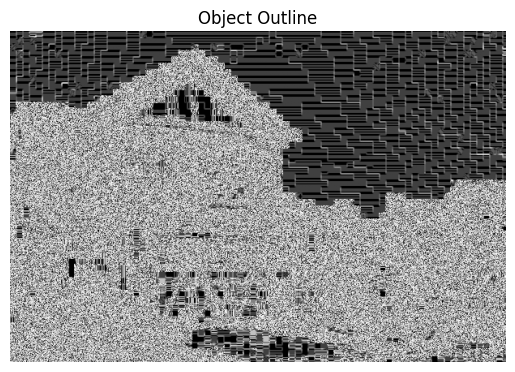

In [19]:
###################Exercise 4: Outline Detection Using Gradients

im = array(Image.open('/content/istockphoto-180735173-612x612.jpg').convert('L'))
imx = filters.sobel(im, 1)
imy = filters.sobel(im, 0)
magnitude = sqrt(imx**2 + imy**2)

imshow(magnitude, cmap='gray'); title('Object Outline'); axis('off')
plt.show()

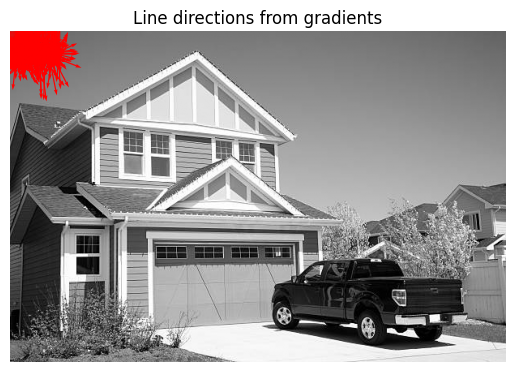

In [20]:
###Exercise 5: Line Detection Using Gradient Direction & Magnitude

from scipy.ndimage import sobel

im = array(Image.open('/content/istockphoto-180735173-612x612.jpg').convert('L')).astype('float')
imx = sobel(im, axis=1)
imy = sobel(im, axis=0)
mag = sqrt(imx**2 + imy**2)
direction = arctan2(imy, imx)

plt.imshow(im, cmap='gray')
plt.quiver(imx[::10, ::10], imy[::10, ::10], color='red')  # Downsampled quiver
plt.title("Line directions from gradients")
plt.axis('off')
plt.show()













<ipython-input-21-3593184562>:5: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels, nbr = measurements.label(im_bin)
<ipython-input-21-3593184562>:7: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  sizes = measurements.sum(im_bin, labels, index=arange(labels.max() + 1))


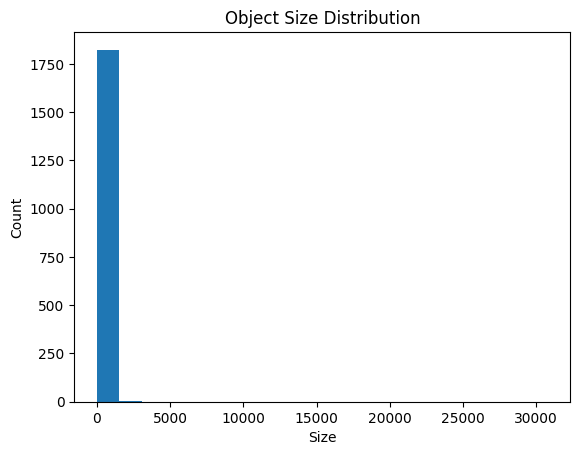

In [21]:
################# Exercise 6: Labeling and Object Size Histogram

im = array(Image.open('/content/istockphoto-180735173-612x612.jpg').convert('L'))
im_bin = (im < 128).astype('int')
labels, nbr = measurements.label(im_bin)

sizes = measurements.sum(im_bin, labels, index=arange(labels.max() + 1))
plt.hist(sizes, bins=20)
plt.title("Object Size Distribution")
plt.xlabel("Size")
plt.ylabel("Count")
plt.show()






<ipython-input-23-3804807826>:28: DeprecationWarning: Please import `binary_opening` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  opened = morphology.binary_opening(im_bin, structure=ones((5,5)), iterations=2)
<ipython-input-23-3804807826>:35: DeprecationWarning: Please import `binary_closing` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  closed = morphology.binary_closing(opened, structure=ones((5,5)), iterations=2)
<ipython-input-23-3804807826>:42: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels, num_objects = measurements.label(closed)
<ipython-input-23-3804807826>:43: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` na

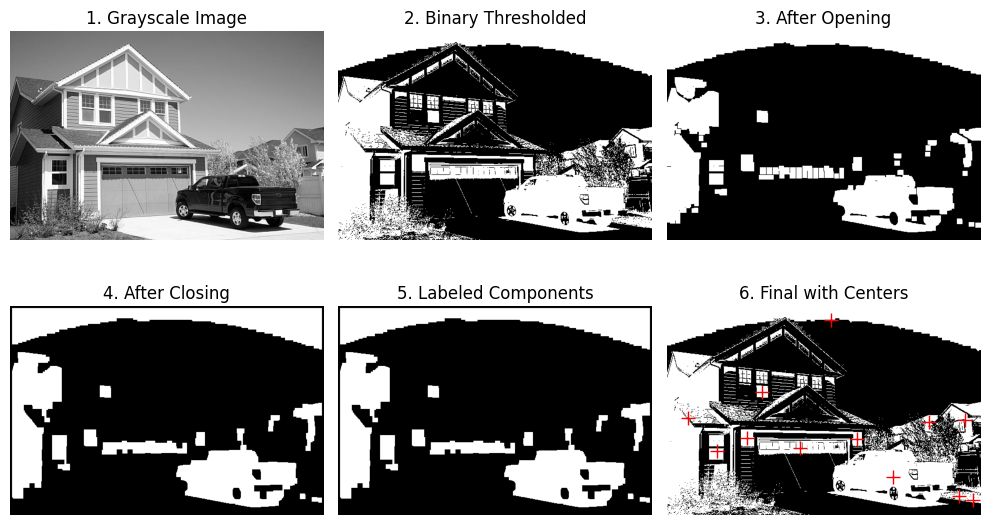

In [23]:
########### Exercise 7: Morphology + Center of Mass

# Required libraries
from PIL import Image
from numpy import *
from pylab import *
from scipy.ndimage import measurements, morphology

# Load and convert the image to grayscale
im = array(Image.open('/content/istockphoto-180735173-612x612.jpg').convert('L'))

# Step 1: Show Grayscale Image
figure(figsize=(10, 6))
subplot(2, 3, 1)
imshow(im, cmap='gray')
title('1. Grayscale Image')
axis('off')

# Step 2: Binary Thresholding
threshold = 128
im_bin = (im < threshold).astype(int)
subplot(2, 3, 2)
imshow(im_bin, cmap='gray')
title('2. Binary Thresholded')
axis('off')

# Step 3: Morphological Opening
opened = morphology.binary_opening(im_bin, structure=ones((5,5)), iterations=2)
subplot(2, 3, 3)
imshow(opened, cmap='gray')
title('3. After Opening')
axis('off')

# Step 4: Morphological Closing
closed = morphology.binary_closing(opened, structure=ones((5,5)), iterations=2)
subplot(2, 3, 4)
imshow(closed, cmap='gray')
title('4. After Closing')
axis('off')

# Step 5: Center of Mass Detection
labels, num_objects = measurements.label(closed)
centers = measurements.center_of_mass(im_bin, labels, range(1, num_objects+1))

subplot(2, 3, 5)
imshow(closed, cmap='gray')
title('5. Labeled Components')
axis('off')

# Step 6: Final Image with Centers
subplot(2, 3, 6)
imshow(im_bin, cmap='gray')
for center in centers:
    plot(center[1], center[0], 'r+', markersize=10)
title('6. Final with Centers')
axis('off')

tight_layout()
show()
